In [1]:
! pip install chembl_webresource_client

     |████████████████████████████████| 61kB 2.6MB/s 
  Created wheel for chembl-webresource-client: filename=chembl_webresource_client-0.10.4-cp37-none-any.whl size=55663 sha256=58805d27624268f52dfebcb953e0b9f6b1595999bfb5dc74618286ffc98c4ed2
  Stored in directory: /root/.cache/pip/wheels/98/4c/16/bdb2ef9c937173e56b04d71fc1a6f98f0ff24992ae2e35daf3
Successfully built chembl-webresource-client


In [2]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [64]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('colorectal cancer')
targets = pd.DataFrame.from_dict(target_query)
targets.shape

(67, 9)

In [65]:
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Cancer-related nucleoside-triphosphatase,14.0,False,CHEMBL4295936,"[{'accession': 'Q9BSD7', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,"[{'xref_id': 'P38398', 'xref_name': None, 'xre...",Homo sapiens,Breast cancer type 1 susceptibility protein,12.0,False,CHEMBL5990,"[{'accession': 'P38398', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,[],None,cancer cell lines,11.0,False,CHEMBL614375,[],CELL-LINE,NaN
3,"[{'xref_id': 'O14519', 'xref_name': None, 'xre...",Homo sapiens,Cyclin-dependent kinase 2-associated protein 1,11.0,False,CHEMBL5578,"[{'accession': 'O14519', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,[],Homo sapiens,Ovarian cancer G-protein coupled receptor 1,11.0,False,CHEMBL3713916,"[{'accession': 'Q15743', 'component_descriptio...",SINGLE PROTEIN,9606.0
...,...,...,...,...,...,...,...,...,...
62,[],Mus musculus,Mitogen-activated protein kinase kinase kinase 20,4.0,False,CHEMBL4523452,"[{'accession': 'Q9ESL4', 'component_descriptio...",SINGLE PROTEIN,10090.0
63,[],Homo sapiens,Aurora kinase A/Targeting protein for Xklp2,3.0,False,CHEMBL3883304,"[{'accession': 'O14965', 'component_descriptio...",PROTEIN COMPLEX,9606.0
64,[],Homo sapiens,Speckle-type POZ protein/PTEN,3.0,False,CHEMBL4523606,"[{'accession': 'P60484', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
65,[],Homo sapiens,Mitochondrial complex I (NADH dehydrogenase),0.0,False,CHEMBL2363065,"[{'accession': 'P03923', 'component_descriptio...",PROTEIN COMPLEX,9606.0


In [169]:
selected_target = targets.target_chembl_id[15]

In [170]:
selected_target

'CHEMBL1795185'

In [171]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [172]:
activity

[{'activity_comment': None, 'activity_id': 31863, 'activity_properties': [], 'assay_chembl_id': 'CHEMBL663853', 'assay_description': 'Inhibitory concentration against human DNA topoisomerase II, alpha mediated relaxation of pBR322; no measurable activity', 'assay_type': 'B', 'assay_variant_accession': None, 'assay_variant_mutation': None, 'bao_endpoint': 'BAO_0000190', 'bao_format': 'BAO_0000357', 'bao_label': 'single protein format', 'canonical_smiles': 'c1ccc(-c2nc3c(-c4nc5ccccc5o4)cccc3o2)cc1', 'data_validity_comment': None, 'data_validity_description': None, 'document_chembl_id': 'CHEMBL1137930', 'document_journal': 'Bioorg. Med. Chem. Lett.', 'document_year': 2004, 'ligand_efficiency': None, 'molecule_chembl_id': 'CHEMBL113081', 'molecule_pref_name': None, 'parent_molecule_chembl_id': 'CHEMBL113081', 'pchembl_value': None, 'potential_duplicate': False, 'qudt_units': 'http://www.openphacts.org/units/Nanomolar', 'record_id': 206172, 'relation': '>', 'src_id': 1, 'standard_flag': Tru

In [173]:
df = pd.DataFrame.from_dict(res)

In [174]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,15091476,[],CHEMBL3383418,Inhibition of human BRDT bromodomain 1 by BROM...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,None,None,CHEMBL3351476,J. Med. Chem.,2014.0,"{'bei': '10.35', 'le': '0.20', 'lle': '-1.50',...",CHEMBL2177300,None,CHEMBL2177300,4.50,False,http://www.openphacts.org/units/Nanomolar,2245344,=,1,True,=,None,IC50,nM,None,31622.78,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,pIC50,None,UO_0000065,None,4.5
1,None,15091477,[],CHEMBL3383419,Inhibition of human BRDT bromodomain 2 by BROM...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,None,None,CHEMBL3351476,J. Med. Chem.,2014.0,"{'bei': '10.35', 'le': '0.20', 'lle': '-1.50',...",CHEMBL2177300,None,CHEMBL2177300,4.50,False,http://www.openphacts.org/units/Nanomolar,2245344,=,1,True,=,None,IC50,nM,None,31622.78,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,pIC50,None,UO_0000065,None,4.5
2,None,15091525,[],CHEMBL3384679,Inhibition of BRDT (unknown origin) by TR-FRET...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,None,None,CHEMBL3351476,J. Med. Chem.,2014.0,"{'bei': '16.78', 'le': '0.32', 'lle': '1.30', ...",CHEMBL2177300,None,CHEMBL2177300,7.30,False,http://www.openphacts.org/units/Nanomolar,2245344,=,1,True,=,None,IC50,nM,None,50.12,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,pIC50,None,UO_0000065,None,7.3
3,None,15627979,[],CHEMBL3587530,Binding affinity to 6-His-FLAG-Tev-BRDT BD1 (1...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,None,None,CHEMBL3585343,J. Med. Chem.,2015.0,"{'bei': '14.59', 'le': '0.27', 'lle': '2.33', ...",CHEMBL3585452,None,CHEMBL3585452,5.10,False,http://www.openphacts.org/units/Nanomolar,2483552,=,1,True,=,None,IC50,nM,None,7943.28,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,pIC50,None,UO_0000065,None,5.1
4,None,15627980,[],CHEMBL3587530,Binding affinity to 6-His-FLAG-Tev-BRDT BD1 (1...,B,None,None,BAO_0000190,BAO_0000357,single protein format,COc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,None,None,CHEMBL3585343,J. Med. Chem.,2015.0,"{'bei': '14.23', 'le': '0.26', 'lle': '2.73', ...",CHEMBL3585455,None,CHEMBL3585455,5.20,False,http://www.openphacts.org/units/Nanomolar,2483555,=,1,True,=,None,IC50,nM,None,6309.57,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,pIC50,None,UO_0000065,None,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Not Determined,19007201,[],CHEMBL4344646,Inhibition of human recombinant His-tagged BRD...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,O=C(CCCCCCC(=O)Nc1ccccc1)NO,None,None,CHEMBL4342471,J Med Chem,2020.0,None,CHEMBL98,VORINOSTAT,CHEMBL98,None,False,None,3171710,None,1,False,None,None,IC50,None,None,None,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,IC50,None,None,None,None
108,None,19057645,[],CHEMBL4357131,Displacement of tetra-acetylated histone H

In [175]:
df.to_csv('colorectal cancer_15_bioactivity_data_raw.csv', index=False)

In [176]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,15091476,[],CHEMBL3383418,Inhibition of human BRDT bromodomain 1 by BROM...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,None,None,CHEMBL3351476,J. Med. Chem.,2014.0,"{'bei': '10.35', 'le': '0.20', 'lle': '-1.50',...",CHEMBL2177300,None,CHEMBL2177300,4.50,False,http://www.openphacts.org/units/Nanomolar,2245344,=,1,True,=,None,IC50,nM,None,31622.78,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,pIC50,None,UO_0000065,None,4.5
1,None,15091477,[],CHEMBL3383419,Inhibition of human BRDT bromodomain 2 by BROM...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,None,None,CHEMBL3351476,J. Med. Chem.,2014.0,"{'bei': '10.35', 'le': '0.20', 'lle': '-1.50',...",CHEMBL2177300,None,CHEMBL2177300,4.50,False,http://www.openphacts.org/units/Nanomolar,2245344,=,1,True,=,None,IC50,nM,None,31622.78,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,pIC50,None,UO_0000065,None,4.5
2,None,15091525,[],CHEMBL3384679,Inhibition of BRDT (unknown origin) by TR-FRET...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,None,None,CHEMBL3351476,J. Med. Chem.,2014.0,"{'bei': '16.78', 'le': '0.32', 'lle': '1.30', ...",CHEMBL2177300,None,CHEMBL2177300,7.30,False,http://www.openphacts.org/units/Nanomolar,2245344,=,1,True,=,None,IC50,nM,None,50.12,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,pIC50,None,UO_0000065,None,7.3
3,None,15627979,[],CHEMBL3587530,Binding affinity to 6-His-FLAG-Tev-BRDT BD1 (1...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,None,None,CHEMBL3585343,J. Med. Chem.,2015.0,"{'bei': '14.59', 'le': '0.27', 'lle': '2.33', ...",CHEMBL3585452,None,CHEMBL3585452,5.10,False,http://www.openphacts.org/units/Nanomolar,2483552,=,1,True,=,None,IC50,nM,None,7943.28,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,pIC50,None,UO_0000065,None,5.1
4,None,15627980,[],CHEMBL3587530,Binding affinity to 6-His-FLAG-Tev-BRDT BD1 (1...,B,None,None,BAO_0000190,BAO_0000357,single protein format,COc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,None,None,CHEMBL3585343,J. Med. Chem.,2015.0,"{'bei': '14.23', 'le': '0.26', 'lle': '2.73', ...",CHEMBL3585455,None,CHEMBL3585455,5.20,False,http://www.openphacts.org/units/Nanomolar,2483555,=,1,True,=,None,IC50,nM,None,6309.57,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,pIC50,None,UO_0000065,None,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,None,19007200,[],CHEMBL4344646,Inhibition of human recombinant His-tagged BRD...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)OC(C...,None,None,CHEMBL4342471,J Med Chem,2020.0,"{'bei': '15.04', 'le': '0.30', 'lle': '1.34', ...",CHEMBL1957266,None,CHEMBL1957266,6.87,False,http://www.openphacts.org/units/Nanomolar,3171711,=,1,True,=,None,IC50,nM,None,134.0,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,IC50,uM,UO

In [177]:
len(df2.canonical_smiles.unique())

79

In [178]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,15091476,[],CHEMBL3383418,Inhibition of human BRDT bromodomain 1 by BROM...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,None,None,CHEMBL3351476,J. Med. Chem.,2014.0,"{'bei': '10.35', 'le': '0.20', 'lle': '-1.50',...",CHEMBL2177300,None,CHEMBL2177300,4.50,False,http://www.openphacts.org/units/Nanomolar,2245344,=,1,True,=,None,IC50,nM,None,31622.78,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,pIC50,None,UO_0000065,None,4.5
3,None,15627979,[],CHEMBL3587530,Binding affinity to 6-His-FLAG-Tev-BRDT BD1 (1...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,None,None,CHEMBL3585343,J. Med. Chem.,2015.0,"{'bei': '14.59', 'le': '0.27', 'lle': '2.33', ...",CHEMBL3585452,None,CHEMBL3585452,5.10,False,http://www.openphacts.org/units/Nanomolar,2483552,=,1,True,=,None,IC50,nM,None,7943.28,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,pIC50,None,UO_0000065,None,5.1
4,None,15627980,[],CHEMBL3587530,Binding affinity to 6-His-FLAG-Tev-BRDT BD1 (1...,B,None,None,BAO_0000190,BAO_0000357,single protein format,COc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,None,None,CHEMBL3585343,J. Med. Chem.,2015.0,"{'bei': '14.23', 'le': '0.26', 'lle': '2.73', ...",CHEMBL3585455,None,CHEMBL3585455,5.20,False,http://www.openphacts.org/units/Nanomolar,2483555,=,1,True,=,None,IC50,nM,None,6309.57,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,pIC50,None,UO_0000065,None,5.2
7,None,15636921,[],CHEMBL3591405,Binding affinity to BRDt containing BD1 bromod...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cncc(-c2cnc(N[C@@H]3CCNC[C@H]3OCC3CCS(=O)(=...,None,None,CHEMBL3588744,J. Med. Chem.,2015.0,"{'bei': '8.80', 'le': '0.17', 'lle': '1.91', '...",CHEMBL3590383,None,CHEMBL3590383,4.50,False,http://www.openphacts.org/units/Nanomolar,2487157,=,1,True,=,None,IC50,nM,None,31622.78,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,pIC50,None,UO_0000065,None,4.5
8,None,15636922,[],CHEMBL3591405,Binding affinity to BRDt containing BD1 bromod...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cncc(-c2cnc(N[C@@H]3CCN(C)C[C@H]3OCC3CCS(=O...,None,None,CHEMBL3588744,J. Med. Chem.,2015.0,None,CHEMBL3590408,None,CHEMBL3590408,None,False,http://www.openphacts.org/units/Nanomolar,2487186,<,1,True,>,None,IC50,nM,None,50118.72,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,pIC50,None,UO_0000065,None,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,None,19007199,[],CHEMBL4344646,Inhibition of human recombinant His-tagged BRD...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1cc(-c2nc3sc4c(c3c(=O)[nH]2)CCN(C)C4)cc(C)c1...,None,None,CHEMBL4342471,J Med Chem,2020.0,None,CHEMBL4514808,None,CHEMBL4514808,None,False,http://www.openphacts.org/units/Nanomolar,3171700,>,1,True,>,None,IC50,nM,None,20000.0,CHEMBL1795185,Homo sapiens,Bromodomain testis-specific protein,9606,None,None,IC50,uM,UO_0000065,None,20.0
108,None,19057645,[],CHEMBL4357131,Displacement of tetra-acetylated hi

In [179]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL2177300,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,31622.78
3,CHEMBL3585452,Cc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,7943.28
4,CHEMBL3585455,COc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,6309.57
7,CHEMBL3590383,Cc1cncc(-c2cnc(N[C@@H]3CCNC[C@H]3OCC3CCS(=O)(=...,31622.78
8,CHEMBL3590408,Cc1cncc(-c2cnc(N[C@@H]3CCN(C)C[C@H]3OCC3CCS(=O...,50118.72
...,...,...,...
105,CHEMBL4514808,Cc1cc(-c2nc3sc4c(c3c(=O)[nH]2)CCN(C)C4)cc(C)c1...,20000.0
108,CHEMBL4446421,COc1ccccc1S(=O)(=O)Nc1ccc2c3c(cc(-n4cnc(C)c4)n...,357.1
109,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0
110,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0


In [180]:
df3.to_csv('colorectal cancer_15_bioactivity_data_preprocessed.csv', index=False)

In [181]:
df4 = pd.read_csv('colorectal cancer_15_bioactivity_data_preprocessed.csv')

In [182]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [183]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2177300,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,31622.78,inactive
1,CHEMBL3585452,Cc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,7943.28,intermediate
2,CHEMBL3585455,COc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,6309.57,intermediate
3,CHEMBL3590383,Cc1cncc(-c2cnc(N[C@@H]3CCNC[C@H]3OCC3CCS(=O)(=...,31622.78,inactive
4,CHEMBL3590408,Cc1cncc(-c2cnc(N[C@@H]3CCN(C)C[C@H]3OCC3CCS(=O...,50118.72,inactive
...,...,...,...,...
74,CHEMBL4514808,Cc1cc(-c2nc3sc4c(c3c(=O)[nH]2)CCN(C)C4)cc(C)c1...,20000.00,inactive
75,CHEMBL4446421,COc1ccccc1S(=O)(=O)Nc1ccc2c3c(cc(-n4cnc(C)c4)n...,357.10,active
76,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active
77,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active


In [184]:
df5.to_csv('colorectal cancer_15_bioactivity_data_curated.csv', index=False)

In [186]:
! zip colorectal_cancer_15.zip *.csv

  adding: colorectal cancer_15_bioactivity_data_curated.csv (deflated 74%)
  adding: colorectal cancer_15_bioactivity_data_preprocessed.csv (deflated 73%)
  adding: colorectal cancer_15_bioactivity_data_raw.csv (deflated 88%)


In [187]:
! ls -l

total 100
-rw-r--r-- 1 root root  6924 Jun 25 15:43 'colorectal cancer_15_bioactivity_data_curated.csv'
-rw-r--r-- 1 root root  6205 Jun 25 15:40 'colorectal cancer_15_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 root root 68115 Jun 25 15:39 'colorectal cancer_15_bioactivity_data_raw.csv'
-rw-r--r-- 1 root root 12009 Jun 25 15:44  colorectal_cancer_15.zip
drwxr-xr-x 1 root root  4096 Jun 15 13:37  sample_data


In [188]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-06-25 15:45:32--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   145MB/s    in 0.6s    

2021-06-25 15:45:33 (145 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [189]:
import pandas as pd

In [190]:
df = pd.read_csv('colorectal cancer_15_bioactivity_data_curated.csv')

In [191]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2177300,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,31622.78,inactive
1,CHEMBL3585452,Cc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,7943.28,intermediate
2,CHEMBL3585455,COc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,6309.57,intermediate
3,CHEMBL3590383,Cc1cncc(-c2cnc(N[C@@H]3CCNC[C@H]3OCC3CCS(=O)(=...,31622.78,inactive
4,CHEMBL3590408,Cc1cncc(-c2cnc(N[C@@H]3CCN(C)C[C@H]3OCC3CCS(=O...,50118.72,inactive
...,...,...,...,...
74,CHEMBL4514808,Cc1cc(-c2nc3sc4c(c3c(=O)[nH]2)CCN(C)C4)cc(C)c1...,20000.00,inactive
75,CHEMBL4446421,COc1ccccc1S(=O)(=O)Nc1ccc2c3c(cc(-n4cnc(C)c4)n...,357.10,active
76,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active
77,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active


In [192]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [193]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [194]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL2177300,31622.78,inactive,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...
1,CHEMBL3585452,7943.28,intermediate,Cc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1
2,CHEMBL3585455,6309.57,intermediate,COc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1
3,CHEMBL3590383,31622.78,inactive,Cc1cncc(-c2cnc(N[C@@H]3CCNC[C@H]3OCC3CCS(=O)(=...
4,CHEMBL3590408,50118.72,inactive,Cc1cncc(-c2cnc(N[C@@H]3CCN(C)C[C@H]3OCC3CCS(=O...
...,...,...,...,...
74,CHEMBL4514808,20000.00,inactive,Cc1cc(-c2nc3sc4c(c3c(=O)[nH]2)CCN(C)C4)cc(C)c1...
75,CHEMBL4446421,357.10,active,COc1ccccc1S(=O)(=O)Nc1ccc2c3c(cc(-n4cnc(C)c4)n...
76,CHEMBL4549667,1000.00,active,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...
77,CHEMBL4088216,1000.00,active,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...


In [195]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [196]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [197]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,434.923,6.00350,2.0,3.0
1,349.438,2.76584,3.0,5.0
2,365.437,2.46602,3.0,6.0
3,511.648,2.58574,3.0,8.0
4,525.675,2.92794,2.0,8.0
...,...,...,...,...
74,470.595,3.70094,3.0,7.0
75,449.492,3.12832,1.0,7.0
76,481.350,3.11620,0.0,5.0
77,402.454,2.35370,0.0,5.0


In [198]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,434.923,6.00350,2.0,3.0
1,349.438,2.76584,3.0,5.0
2,365.437,2.46602,3.0,6.0
3,511.648,2.58574,3.0,8.0
4,525.675,2.92794,2.0,8.0
...,...,...,...,...
74,470.595,3.70094,3.0,7.0
75,449.492,3.12832,1.0,7.0
76,481.350,3.11620,0.0,5.0
77,402.454,2.35370,0.0,5.0


In [199]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2177300,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,31622.78,inactive
1,CHEMBL3585452,Cc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,7943.28,intermediate
2,CHEMBL3585455,COc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,6309.57,intermediate
3,CHEMBL3590383,Cc1cncc(-c2cnc(N[C@@H]3CCNC[C@H]3OCC3CCS(=O)(=...,31622.78,inactive
4,CHEMBL3590408,Cc1cncc(-c2cnc(N[C@@H]3CCN(C)C[C@H]3OCC3CCS(=O...,50118.72,inactive
...,...,...,...,...
74,CHEMBL4514808,Cc1cc(-c2nc3sc4c(c3c(=O)[nH]2)CCN(C)C4)cc(C)c1...,20000.00,inactive
75,CHEMBL4446421,COc1ccccc1S(=O)(=O)Nc1ccc2c3c(cc(-n4cnc(C)c4)n...,357.10,active
76,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active
77,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active


In [200]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [201]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2177300,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,31622.78,inactive,434.923,6.00350,2.0,3.0
1,CHEMBL3585452,Cc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,7943.28,intermediate,349.438,2.76584,3.0,5.0
2,CHEMBL3585455,COc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,6309.57,intermediate,365.437,2.46602,3.0,6.0
3,CHEMBL3590383,Cc1cncc(-c2cnc(N[C@@H]3CCNC[C@H]3OCC3CCS(=O)(=...,31622.78,inactive,511.648,2.58574,3.0,8.0
4,CHEMBL3590408,Cc1cncc(-c2cnc(N[C@@H]3CCN(C)C[C@H]3OCC3CCS(=O...,50118.72,inactive,525.675,2.92794,2.0,8.0
...,...,...,...,...,...,...,...,...
74,CHEMBL4514808,Cc1cc(-c2nc3sc4c(c3c(=O)[nH]2)CCN(C)C4)cc(C)c1...,20000.00,inactive,470.595,3.70094,3.0,7.0
75,CHEMBL4446421,COc1ccccc1S(=O)(=O)Nc1ccc2c3c(cc(-n4cnc(C)c4)n...,357.10,active,449.492,3.12832,1.0,7.0
76,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active,481.350,3.11620,0.0,5.0
77,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active,402.454,2.35370,0.0,5.0


In [202]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [203]:
df_combined.standard_value.describe()

count        79.00000
mean      28471.58443
std       53752.99256
min          14.00000
25%         385.00000
50%        2300.00000
75%       28806.39000
max      250000.00000
Name: standard_value, dtype: float64

In [204]:
-np.log10( (10**-9)* 100000000 )

1.0

In [205]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [206]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [207]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL2177300,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,inactive,434.923,6.00350,2.0,3.0,31622.78
1,CHEMBL3585452,Cc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,intermediate,349.438,2.76584,3.0,5.0,7943.28
2,CHEMBL3585455,COc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,intermediate,365.437,2.46602,3.0,6.0,6309.57
3,CHEMBL3590383,Cc1cncc(-c2cnc(N[C@@H]3CCNC[C@H]3OCC3CCS(=O)(=...,inactive,511.648,2.58574,3.0,8.0,31622.78
4,CHEMBL3590408,Cc1cncc(-c2cnc(N[C@@H]3CCN(C)C[C@H]3OCC3CCS(=O...,inactive,525.675,2.92794,2.0,8.0,50118.72
...,...,...,...,...,...,...,...,...
74,CHEMBL4514808,Cc1cc(-c2nc3sc4c(c3c(=O)[nH]2)CCN(C)C4)cc(C)c1...,inactive,470.595,3.70094,3.0,7.0,20000.00
75,CHEMBL4446421,COc1ccccc1S(=O)(=O)Nc1ccc2c3c(cc(-n4cnc(C)c4)n...,active,449.492,3.12832,1.0,7.0,357.10
76,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,1000.00
77,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,1000.00


In [208]:
df_norm.standard_value_norm.describe()

count        79.00000
mean      28471.58443
std       53752.99256
min          14.00000
25%         385.00000
50%        2300.00000
75%       28806.39000
max      250000.00000
Name: standard_value_norm, dtype: float64

In [209]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2177300,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,inactive,434.923,6.00350,2.0,3.0,4.50000
1,CHEMBL3585452,Cc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,intermediate,349.438,2.76584,3.0,5.0,5.10000
2,CHEMBL3585455,COc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,intermediate,365.437,2.46602,3.0,6.0,5.20000
3,CHEMBL3590383,Cc1cncc(-c2cnc(N[C@@H]3CCNC[C@H]3OCC3CCS(=O)(=...,inactive,511.648,2.58574,3.0,8.0,4.50000
4,CHEMBL3590408,Cc1cncc(-c2cnc(N[C@@H]3CCN(C)C[C@H]3OCC3CCS(=O...,inactive,525.675,2.92794,2.0,8.0,4.30000
...,...,...,...,...,...,...,...,...
74,CHEMBL4514808,Cc1cc(-c2nc3sc4c(c3c(=O)[nH]2)CCN(C)C4)cc(C)c1...,inactive,470.595,3.70094,3.0,7.0,4.69897
75,CHEMBL4446421,COc1ccccc1S(=O)(=O)Nc1ccc2c3c(cc(-n4cnc(C)c4)n...,active,449.492,3.12832,1.0,7.0,6.44721
76,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.00000
77,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.00000


In [210]:
df_final.pIC50.describe()

count    79.000000
mean      5.535037
std       1.106481
min       3.602060
25%       4.542597
50%       5.638272
75%       6.414611
max       7.853872
Name: pIC50, dtype: float64

In [211]:
df_final.to_csv('colorectal cancer_15_bioactivity_data_3class_pIC50.csv')

In [212]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2177300,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,inactive,434.923,6.00350,2.0,3.0,4.50000
3,CHEMBL3590383,Cc1cncc(-c2cnc(N[C@@H]3CCNC[C@H]3OCC3CCS(=O)(=...,inactive,511.648,2.58574,3.0,8.0,4.50000
4,CHEMBL3590408,Cc1cncc(-c2cnc(N[C@@H]3CCN(C)C[C@H]3OCC3CCS(=O...,inactive,525.675,2.92794,2.0,8.0,4.30000
5,CHEMBL3774931,CCCCc1c(C)nc2nc(SCc3nc4c(c(=O)[nH]c(=O)n4CCCC)...,inactive,484.630,3.39574,1.0,10.0,4.00000
8,CHEMBL3774900,CCn1c(CSc2n[nH]c(N)n2)nc2c1c(=O)[nH]c(=O)n2Cc1...,inactive,432.897,1.60050,3.0,9.0,4.00000
...,...,...,...,...,...,...,...,...
74,CHEMBL4514808,Cc1cc(-c2nc3sc4c(c3c(=O)[nH]2)CCN(C)C4)cc(C)c1...,inactive,470.595,3.70094,3.0,7.0,4.69897
75,CHEMBL4446421,COc1ccccc1S(=O)(=O)Nc1ccc2c3c(cc(-n4cnc(C)c4)n...,active,449.492,3.12832,1.0,7.0,6.44721
76,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.00000
77,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.00000


In [213]:
df_2class.to_csv('colorectal_15_bioactivity_data_2class_pIC50.csv')

In [214]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

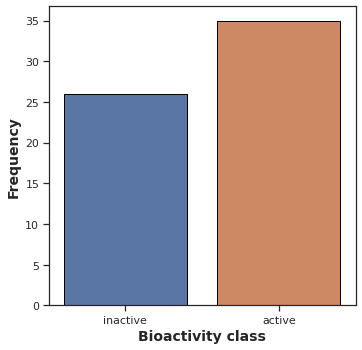

In [215]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class_colorectal_cancer.pdf')

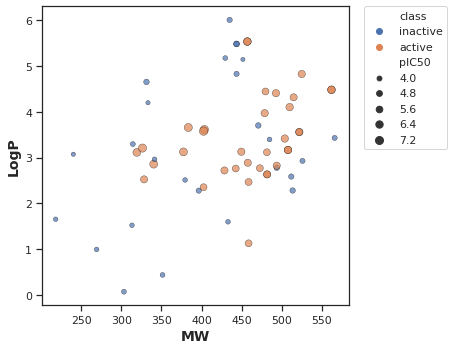

In [216]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP_colorectal_cancer.pdf')

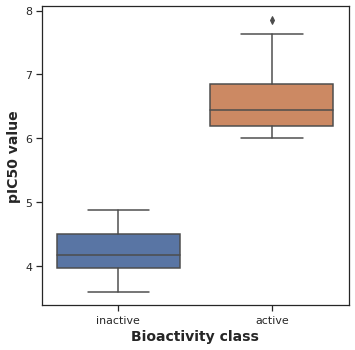

In [217]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50_colorectal_cancer.pdf')

In [218]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [219]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.669859e-11,0.05,Different distribution (reject H0)


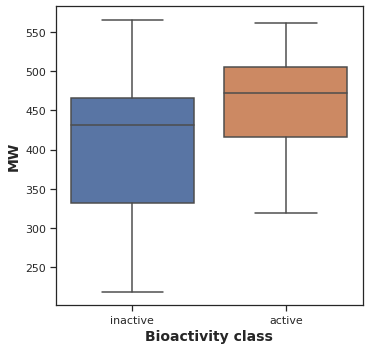

In [220]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW_colorectal_cancer.pdf')

In [221]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,290.0,0.008217,0.05,Different distribution (reject H0)


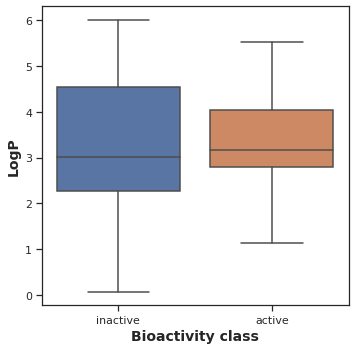

In [222]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP_colorectal_cancer.pdf')

In [223]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,399.0,0.209128,0.05,Same distribution (fail to reject H0)


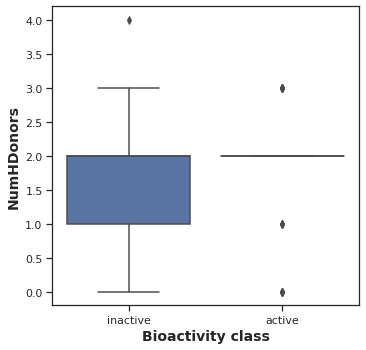

In [224]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors_colorectal_cancer.pdf')

In [225]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,411.5,0.248878,0.05,Same distribution (fail to reject H0)


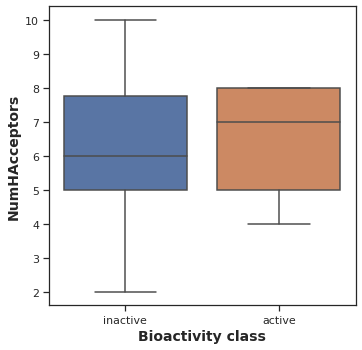

In [226]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors_colorectal_cancer.pdf')

In [227]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,387.0,0.156919,0.05,Same distribution (fail to reject H0)


In [228]:
! zip -r results_ID_colorectal_cancer_15.zip . -i *.csv *.pdf

  adding: colorectal cancer_15_bioactivity_data_preprocessed.csv (deflated 73%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_bioactivity_class_colorectal_cancer.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_MW_colorectal_cancer.pdf (deflated 39%)
  adding: colorectal_15_bioactivity_data_2class_pIC50.csv (deflated 69%)
  adding: plot_MW_vs_LogP_colorectal_cancer.pdf (deflated 19%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: colorectal cancer_15_bioactivity_data_3class_pIC50.csv (deflated 69%)
  adding: plot_NumHDonors_colorectal_cancer.pdf (deflated 38%)
  adding: plot_LogP_colorectal_cancer.pdf (deflated 37%)
  adding: plot_NumHAcceptors_colorectal_cancer.pdf (deflated 36%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: plot_ic50_colorectal_cancer.pdf (deflated 37%)
  adding: colorectal cancer_15_bioactivity_data_raw.csv (deflated 88%)
  adding: colorecta

In [229]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-06-25 15:59:16--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-06-25 15:59:16--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  32.8MB/s    in 0.7s    

2021-06-25 15:59:17 (32.8 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2021-06-25 15:59:17--  https://githu

In [230]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [231]:
import pandas as pd

In [233]:
df3 = pd.read_csv('colorectal cancer_15_bioactivity_data_3class_pIC50.csv')

In [234]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL2177300,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,inactive,434.923,6.00350,2.0,3.0,4.50000
1,1,CHEMBL3585452,Cc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,intermediate,349.438,2.76584,3.0,5.0,5.10000
2,2,CHEMBL3585455,COc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1,intermediate,365.437,2.46602,3.0,6.0,5.20000
3,3,CHEMBL3590383,Cc1cncc(-c2cnc(N[C@@H]3CCNC[C@H]3OCC3CCS(=O)(=...,inactive,511.648,2.58574,3.0,8.0,4.50000
4,4,CHEMBL3590408,Cc1cncc(-c2cnc(N[C@@H]3CCN(C)C[C@H]3OCC3CCS(=O...,inactive,525.675,2.92794,2.0,8.0,4.30000
...,...,...,...,...,...,...,...,...,...
74,74,CHEMBL4514808,Cc1cc(-c2nc3sc4c(c3c(=O)[nH]2)CCN(C)C4)cc(C)c1...,inactive,470.595,3.70094,3.0,7.0,4.69897
75,75,CHEMBL4446421,COc1ccccc1S(=O)(=O)Nc1ccc2c3c(cc(-n4cnc(C)c4)n...,active,449.492,3.12832,1.0,7.0,6.44721
76,76,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.00000
77,77,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.00000


In [235]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [236]:
! cat molecule.smi | head -5

CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2ccc(Cl)cc2)C[C@@H]1C	CHEMBL2177300
Cc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1	CHEMBL3585452
COc1cncc(-c2cnc(NC3CCNCC3)c3[nH]c(=O)c(C)cc23)c1	CHEMBL3585455
Cc1cncc(-c2cnc(N[C@@H]3CCNC[C@H]3OCC3CCS(=O)(=O)CC3)c3[nH]c(=O)c(C)cc23)c1	CHEMBL3590383
Cc1cncc(-c2cnc(N[C@@H]3CCN(C)C[C@H]3OCC3CCS(=O)(=O)CC3)c3[nH]c(=O)c(C)cc23)c1	CHEMBL3590408


In [237]:
! cat molecule.smi | wc -l

79


In [238]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [239]:
! bash padel.sh

Processing CHEMBL2177300 in molecule.smi (1/79). 
Processing CHEMBL3585452 in molecule.smi (2/79). 
Processing CHEMBL3585455 in molecule.smi (3/79). Average speed: 2.53 s/mol.
Processing CHEMBL3590383 in molecule.smi (4/79). Average speed: 1.49 s/mol.
Processing CHEMBL3590408 in molecule.smi (5/79). Average speed: 1.13 s/mol.
Processing CHEMBL3774931 in molecule.smi (6/79). Average speed: 1.00 s/mol.
Processing CHEMBL3775270 in molecule.smi (7/79). Average speed: 0.86 s/mol.
Processing CHEMBL3775058 in molecule.smi (8/79). Average speed: 0.75 s/mol.
Processing CHEMBL3774900 in molecule.smi (9/79). Average speed: 0.66 s/mol.
Processing CHEMBL513909 in molecule.smi (11/79). Average speed: 0.55 s/mol.
Processing CHEMBL2103840 in molecule.smi (10/79). Average speed: 0.60 s/mol.
Processing CHEMBL1995703 in molecule.smi (12/79). Average speed: 0.54 s/mol.
Processing CHEMBL1287853 in molecule.smi (13/79). Average speed: 0.51 s/mol.
Processing CHEMBL2132936 in molecule.smi (15/79). Average spe

In [240]:
! ls -l

total 108772
-rw-r--r-- 1 root root     8771 Jun 25 15:52  colorectal_15_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root    11388 Jun 25 15:52 'colorectal cancer_15_bioactivity_data_3class_pIC50.csv'
-rw-r--r-- 1 root root     6924 Jun 25 15:43 'colorectal cancer_15_bioactivity_data_curated.csv'
-rw-r--r-- 1 root root     6205 Jun 25 15:40 'colorectal cancer_15_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 root root    68115 Jun 25 15:39 'colorectal cancer_15_bioactivity_data_raw.csv'
-rw-r--r-- 1 root root    12009 Jun 25 15:44  colorectal_cancer_15.zip
-rw-r--r-- 1 root root   151800 Jun 25 16:03  descriptors_output.csv
drwxr-xr-x 3 root root     4096 Jun 25 15:59  __MACOSX
-rw-r--r-- 1 root root      122 Jun 25 15:56  mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      118 Jun 25 15:56  mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      131 Jun 25 15:58  mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      128 Jun 25 15:57  mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root r

In [242]:
df3_X = pd.read_csv('descriptors_output.csv')

In [243]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3585452,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL2177300,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3585455,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL3590383,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL3590408,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CHEMBL4514808,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75,CHEMBL4446421,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76,CHEMBL4549667,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77,CHEMBL4088216,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [244]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [245]:
df3_Y = df3['pIC50']
df3_Y

0     4.50000
1     5.10000
2     5.20000
3     4.50000
4     4.30000
       ...   
74    4.69897
75    6.44721
76    6.00000
77    6.00000
78    6.00000
Name: pIC50, Length: 79, dtype: float64

In [246]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.50000
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.10000
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.20000
3,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.50000
4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.69897
75,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.44721
76,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.00000
77,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.00000


In [247]:
dataset3.to_csv('colorectal_cancer_15_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [248]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [250]:
df = pd.read_csv('colorectal_cancer_15_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [251]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [252]:
Y = df.pIC50
Y

0     4.50000
1     5.10000
2     5.20000
3     4.50000
4     4.30000
       ...   
74    4.69897
75    6.44721
76    6.00000
77    6.00000
78    6.00000
Name: pIC50, Length: 79, dtype: float64

In [253]:
X.shape

(79, 881)

In [254]:
Y.shape

(79,)

In [255]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [256]:
X.shape

(79, 147)

In [257]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [258]:
X_train.shape, Y_train.shape

((63, 147), (63,))

In [259]:
X_test.shape, Y_test.shape

((16, 147), (16,))

In [260]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.2333666127248779

In [261]:
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

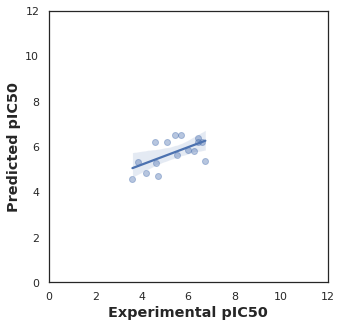

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [263]:
! pip install lazypredict

     |████████████████████████████████| 72 kB 463 kB/s 
     |████████████████████████████████| 127.6 MB 7.6 kB/s 
     |████████████████████████████████| 82 kB 344 kB/s 
     |████████████████████████████████| 248 kB 50.3 MB/s 
     |████████████████████████████████| 14.5 MB 7.0 kB/s 
     |████████████████████████████████| 269 kB 42.9 MB/s 
     |████████████████████████████████| 10.1 MB 97 kB/s 
     |████████████████████████████████| 302 kB 49.5 MB/s 
     |████████████████████████████████| 6.8 MB 32.0 MB/s 
     |████████████████████████████████| 1.2 MB 27.4 MB/s 
     |████████████████████████████████| 25.9 MB 1.1 kB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 97 kB 5.6 MB/s 
     |████████████████████████████████| 48 kB 4.3 MB/s 
     |████████████████████████████████| 40 kB 5.1 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=393

In [264]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [265]:
df = pd.read_csv('colorectal_cancer_15_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [266]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [267]:
# Examine X dimension
X.shape

(79, 881)

In [268]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(79, 147)

In [269]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [270]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 38/38 [00:00<00:00, 14645.19it/s]

[17:13:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [271]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,14327417939501161494137722582276009730287678655...,-1964242782028385269848167102032485442948704236...,1497023061775043283345132018991104.00,0.14
KernelRidge,20.84,-26.19,5.57,0.03
DummyRegressor,1.73,0.00,1.07,0.02
LassoLarsIC,1.73,0.00,1.07,0.03
LassoLars,1.73,0.00,1.07,0.01
Lasso,1.73,0.00,1.07,0.01
ElasticNet,1.70,0.04,1.04,0.03
LarsCV,1.58,0.21,0.95,0.42
KNeighborsRegressor,1.39,0.47,0.78,0.03


In [272]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


In [273]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

[(0.0, 1.0)]

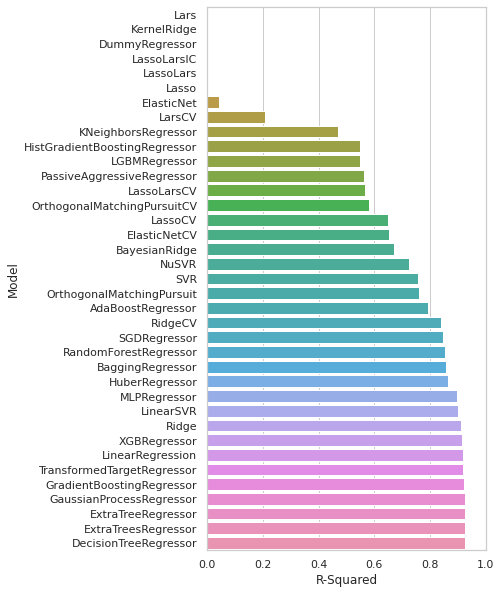

In [274]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

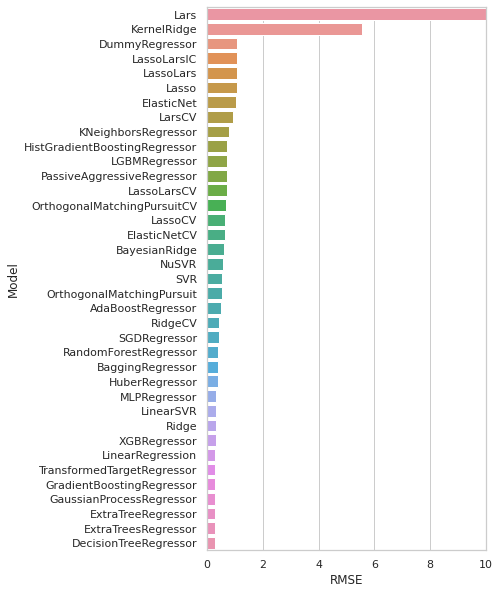

In [275]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

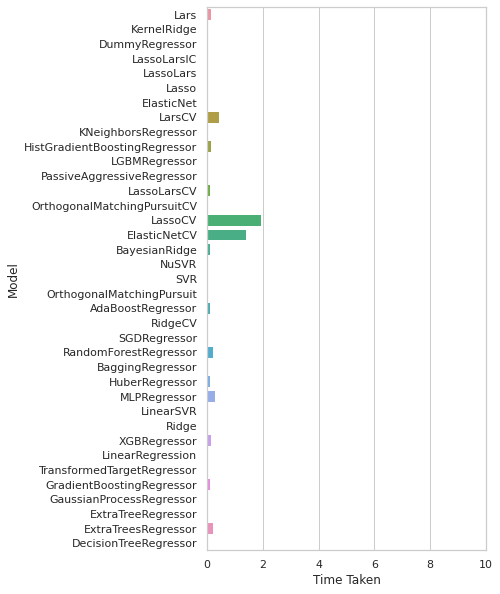

In [290]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))


QSAR Model Building of colorectal_cancer

In [277]:
dataset = pd.read_csv('colorectal_cancer_15_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.50
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.10
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.20
3,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.50
4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.70
75,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.45
76,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.00
77,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.00


In [278]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [279]:
Y = dataset.iloc[:,-1]
Y

0    4.50
1    5.10
2    5.20
3    4.50
4    4.30
     ... 
74   4.70
75   6.45
76   6.00
77   6.00
78   6.00
Name: pIC50, Length: 79, dtype: float64

**Remove low variance features**

In [280]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP150,PubchemFP152,PubchemFP153,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP192,PubchemFP194,PubchemFP195,PubchemFP199,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP287,PubchemFP293,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP308,PubchemFP335,PubchemFP338,PubchemFP339,PubchemFP341,PubchemFP346,PubchemFP353,PubchemFP357,...,PubchemFP652,PubchemFP654,PubchemFP655,PubchemFP658,PubchemFP659,PubchemFP666,PubchemFP667,PubchemFP671,PubchemFP672,PubchemFP673,PubchemFP674,PubchemFP680,PubchemFP682,PubchemFP684,PubchemFP685,PubchemFP686,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP704,PubchemFP707,PubchemFP712,PubchemFP716,PubchemFP734,PubchemFP735,PubchemFP737,PubchemFP758,PubchemFP763,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP821,PubchemFP826
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,1,0,1,1,1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,1,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,0,...,0,1,0,1,1,0,0,1,1,0,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,0,...,0,1,0,1,1,0,0,1,1,0,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,1,1,1,0,1,1,0,0,1,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,0,...,0,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
75,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,...,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0
76,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,...,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
77,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,...,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [281]:
X.to_csv('descriptor_list_colorectal_cancer_15.csv', index = False)

# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

Random Forest Regression **Model**

In [282]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [283]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.853244202130609

Model Prediction

In [284]:
Y_pred = model.predict(X)
Y_pred

array([4.6548132 , 5.35793332, 4.97265779, 4.52291104, 4.43866986,
       4.46758209, 4.90544368, 5.18726644, 4.45899491, 4.86975961,
       5.88325828, 6.22534347, 6.02423869, 5.93541225, 6.15865262,
       4.58835161, 6.71864091, 7.1530373 , 7.13078339, 7.23277784,
       7.44884348, 7.28992813, 7.37478453, 7.3123466 , 5.18305509,
       4.40810294, 4.22932435, 4.42412093, 4.61059345, 4.3906891 ,
       4.43418449, 4.37018114, 4.72174369, 5.56249164, 6.05662977,
       6.05662977, 5.93687352, 6.00292254, 4.3254556 , 5.93541225,
       5.53083297, 5.49464103, 5.10331206, 6.1146558 , 5.58588344,
       5.88325828, 5.88325828, 5.88325828, 5.88325828, 5.88325828,
       6.04979164, 5.9012014 , 4.9331782 , 6.34535601, 6.4370116 ,
       6.23061984, 6.36129914, 6.15477774, 5.88325828, 6.22573645,
       6.02397972, 6.02397972, 6.02397972, 6.02397972, 4.66379987,
       3.974477  , 4.72770757, 5.23719463, 5.02297055, 3.974477  ,
       4.73349621, 4.40909519, 5.30196995, 5.08353273, 4.90698

Model Performance

In [285]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.18
Coefficient of determination (R^2): 0.85


Data Visualization (Experimental vs Predicted pIC50 for Training Data)bold text

In [286]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

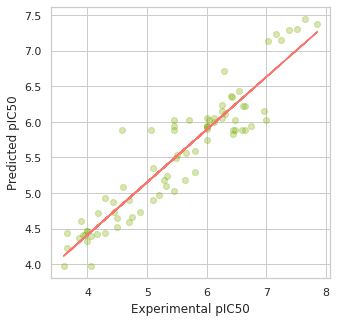

In [287]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

Save Model as Pickle Object

In [288]:
import pickle

In [291]:
pickle.dump(model, open('colorectal_cancer_model.pkl', 'wb'))